In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from astropy.table import Table
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib

import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import galpy
from galpy.orbit import Orbit

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

In [2]:
data = Table.read('/Users/ioanaciuca/Desktop/BINGO_P3/data/SD_pred_highquality.fits')

In [3]:
z = data['dist_2']*np.sin(data['GLAT']*np.pi/180) + 0.025

mask = ((data['M_H_1'] > -1.0) & (data['R_2'] >=7.0) & (data['R_2'] <= 9.0) & (data['z_2c'] <= 2.0))
data_cut = data[mask] 


/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)

/Users/ioanaciuca/anaconda3/envs/moreDL/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, op)(other)



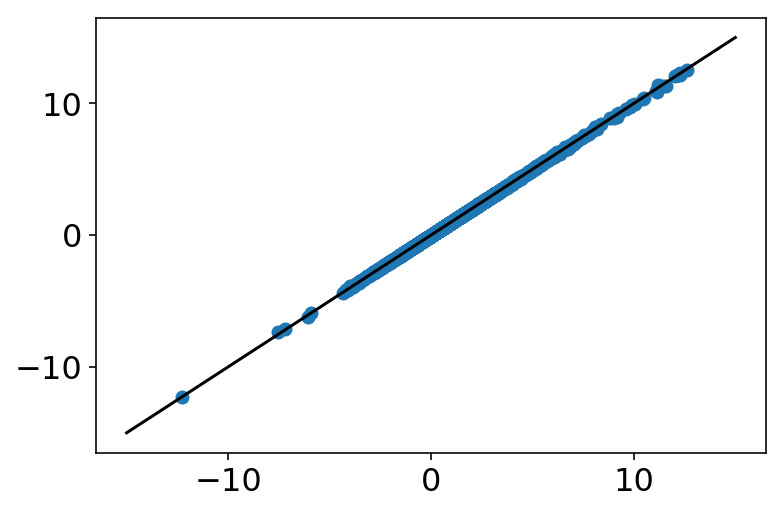

In [4]:
plt.scatter(z, data['z_2c']-0.025)
plt.plot([-15, 15], [-15, 15], color='k')

In [6]:
print(len(data_cut))

14321


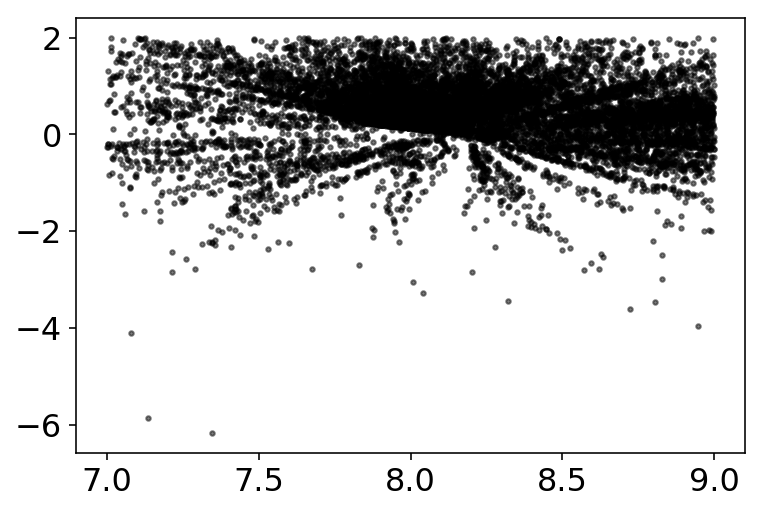

In [7]:
plt.scatter(data_cut['R_2'], data_cut['z_2c'], s=5, color='k', alpha=0.5)

In [8]:
mh = data_cut['M_H_1']
alpha = data_cut['ALPHA_M_1']
logAge = data_cut['pred_logAge']
vz = data_cut['vz_2']
vphi = data_cut['vphi_2']
Jz = data_cut['Jz_2']
Rc = data_cut['Rc_2']
JR = data_cut['JR_2']
R = data_cut['R_2']

In [55]:
norm_mh = mpl.colors.Normalize(vmin=-1.0, vmax=0.5)
norm_rc = mpl.colors.Normalize(vmin=6.0, vmax=10.0)
norm_alpha = mpl.colors.Normalize(vmin=-0.05, vmax=0.3)
norm_age = mpl.colors.Normalize(vmin=8, vmax=15)
norm_logAge = mpl.colors.Normalize(vmin=0.8, vmax=1.1)
norm_Jz = mpl.colors.Normalize(vmin=0, vmax=30.0)

# I. General plots

# [alpha/fe] vs age colored with [fe/h]
# [Fe/H] vs age colored with [Rc]


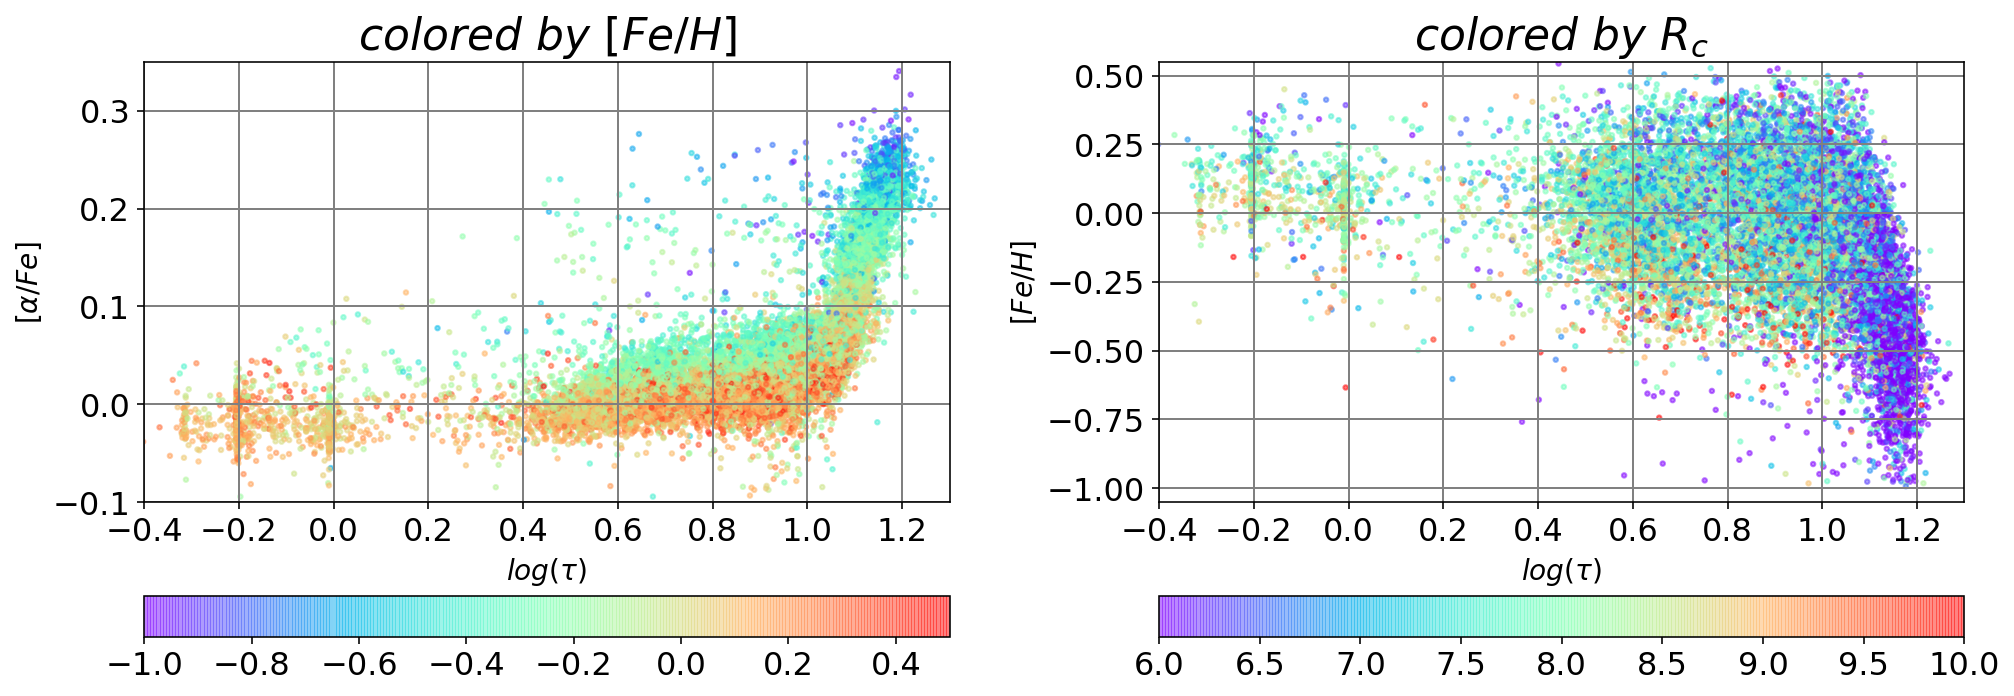

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,5))


cm_rainbow = 'rainbow'
size = 5


im1 = ax1.scatter(logAge, alpha, c=mh, cmap=cm_rainbow, s=size, norm=norm_mh, alpha=0.5, label=r'$7 <= R <= 9 kpc; \ N=15006$')
im2 = ax2.scatter(logAge, mh, c=Rc, cmap=cm_rainbow, s=size, alpha=0.5, norm=norm_rc)

#ax1.legend(fontsize=18, loc='upper center')

ax1.set_xlabel(r'$log(\tau)$', fontsize=14)
ax2.set_xlabel(r'$log(\tau)$', fontsize=14)

fig.colorbar(im1, ax=ax1, orientation='horizontal')
fig.colorbar(im2, ax=ax2, orientation='horizontal')

ax1.set_ylabel(r'$[{\alpha}/Fe]$', fontsize=14)
ax2.set_ylabel(r'$[Fe/H]$', fontsize=14)

ax1.set_title(r'$colored \ by \ [Fe/H]$', fontsize=22)
ax2.set_title(r'$colored \ by \ R_c$', fontsize=22)

ax1.set_ylim(-0.1, 0.35)
ax2.set_ylim(-1.05, 0.55)

ax1.set_xlim(-0.4, 1.3)
ax2.set_xlim(-0.4, 1.3)

ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(0.25))

ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_major_locator(MultipleLocator(0.2))

lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')

fig.tight_layout()
plt.savefig('./logAge_afe_mh.png', format='png', dpi=200)

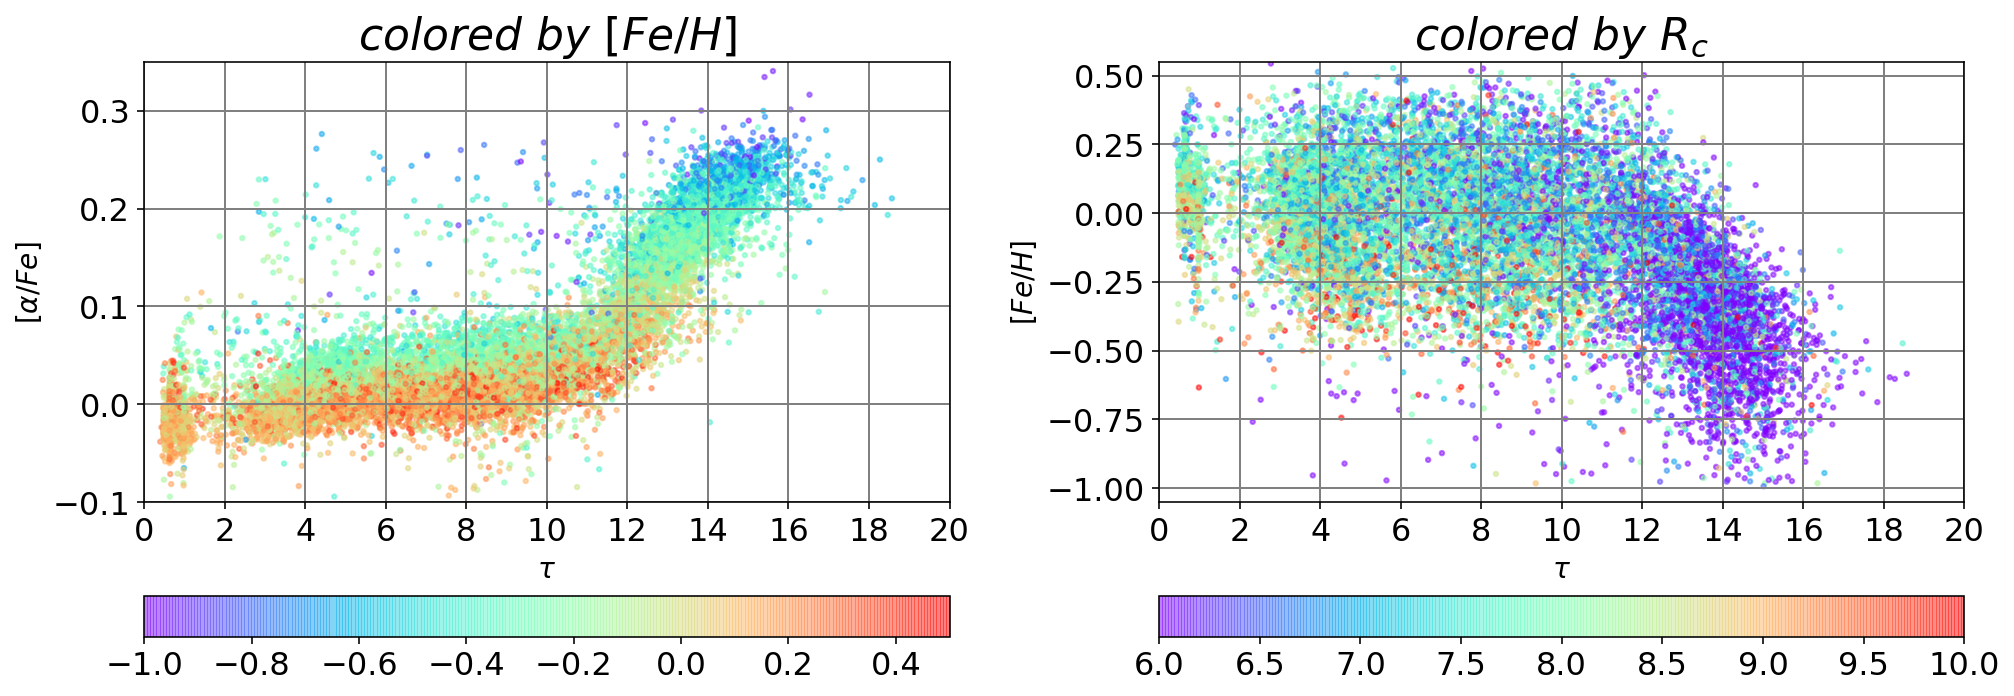

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,5))


cm_rainbow = 'rainbow'
size = 5


im1 = ax1.scatter(10**logAge, alpha, c=mh, cmap=cm_rainbow, s=size, norm=norm_mh, alpha=0.5, label=r'$7 <= R <= 9 kpc; \ N=15006$')
im2 = ax2.scatter(10**logAge, mh, c=Rc, cmap=cm_rainbow, s=size, alpha=0.5, norm=norm_rc)

#ax1.legend(fontsize=18, loc='upper center')

ax1.set_xlabel(r'$\tau$', fontsize=14)
ax2.set_xlabel(r'$\tau$', fontsize=14)

fig.colorbar(im1, ax=ax1, orientation='horizontal')
fig.colorbar(im2, ax=ax2, orientation='horizontal')

ax1.set_ylabel(r'$[{\alpha}/Fe]$', fontsize=14)
ax2.set_ylabel(r'$[Fe/H]$', fontsize=14)

ax1.set_title(r'$colored \ by \ [Fe/H]$', fontsize=22)
ax2.set_title(r'$colored \ by \ R_c$', fontsize=22)

ax1.set_ylim(-0.1, 0.35)
ax2.set_ylim(-1.05, 0.55)

ax1.set_xlim(0.0, 20)
ax2.set_xlim(0.0, 20)

ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(0.25))

ax1.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_major_locator(MultipleLocator(2))

lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')

fig.tight_layout()
plt.savefig('./Age_afe_mh.png', format='png', dpi=200)

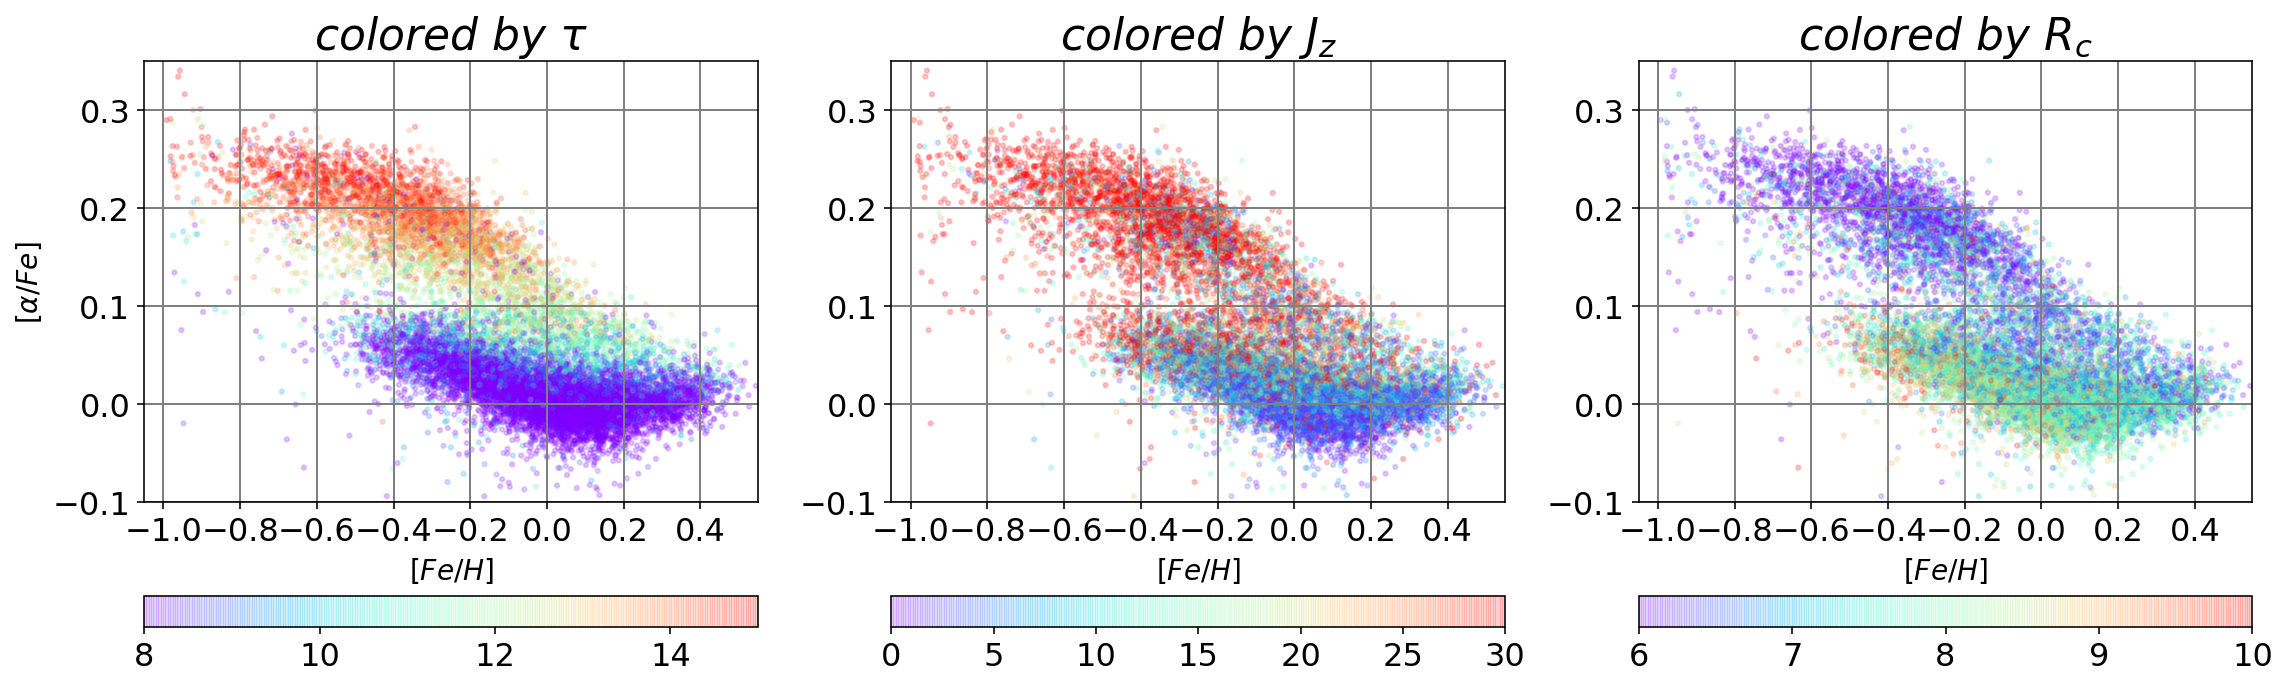

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,5))

cm_rainbow = 'rainbow'
size = 5

im1 = ax1.scatter(mh, alpha, c=10**logAge, cmap=cm_rainbow, s=size, norm=norm_age, alpha=0.2,  label=r'$7 <= R <= 9 kpc; \ N=15006$')
im2 = ax2.scatter(mh, alpha, c=Jz, cmap=cm_rainbow, s=size, alpha=0.2, norm=norm_Jz)
im3 = ax3.scatter(mh, alpha, c=Rc, cmap=cm_rainbow, s=size, alpha=0.2, norm=norm_rc)

fig.colorbar(im1, ax=ax1, orientation='horizontal')
fig.colorbar(im2, ax=ax2, orientation='horizontal')
fig.colorbar(im3, ax=ax3, orientation='horizontal')

ax1.set_ylabel(r'$[{\alpha}/Fe]$', fontsize=14)
ax1.set_xlabel(r'$[Fe/H]$', fontsize=14)
ax2.set_xlabel(r'$[Fe/H]$', fontsize=14)
ax3.set_xlabel(r'$[Fe/H]$', fontsize=14)

ax1.set_title(r'$colored \ by \ \tau $', fontsize=22)
ax2.set_title(r'$colored \ by \ J_z$', fontsize=22)
ax3.set_title(r'$colored \ by \ R_c$', fontsize=22)

ax1.set_xlim(-1.05, 0.55)
ax2.set_xlim(-1.05, 0.55)
ax3.set_xlim(-1.05, 0.55)

ax1.set_ylim(-0.1, 0.35)
ax2.set_ylim(-0.1, 0.35)
ax3.set_ylim(-0.1, 0.35)

ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax3.xaxis.set_major_locator(MultipleLocator(0.2))

ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(0.1))
ax3.yaxis.set_major_locator(MultipleLocator(0.1))

lw=1.0
ax1.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax2.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
ax3.grid(which='major', axis='both', linestyle='-', linewidth=lw, color='gray')
fig.tight_layout()

plt.savefig('./afe_feh_general.png', format='png', dpi=200)